In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\www\Downloads\glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# There are no nulls present in dataset 

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [8]:
#•	1- building_windows_float_processed
#•	2- building_windows_non_float_processed
#•	3- vehicle_windows_float_processed
#•	4- vehicle_windows_non_float_processed (none in this database)
#•	5- containers
#•	6- tableware
#•	7- headlamps


In [9]:
# bulding window float processed and non float window glasses have maximum counts which means this dataset belongs to the crime investiation in which maximum glass broke is of windows 

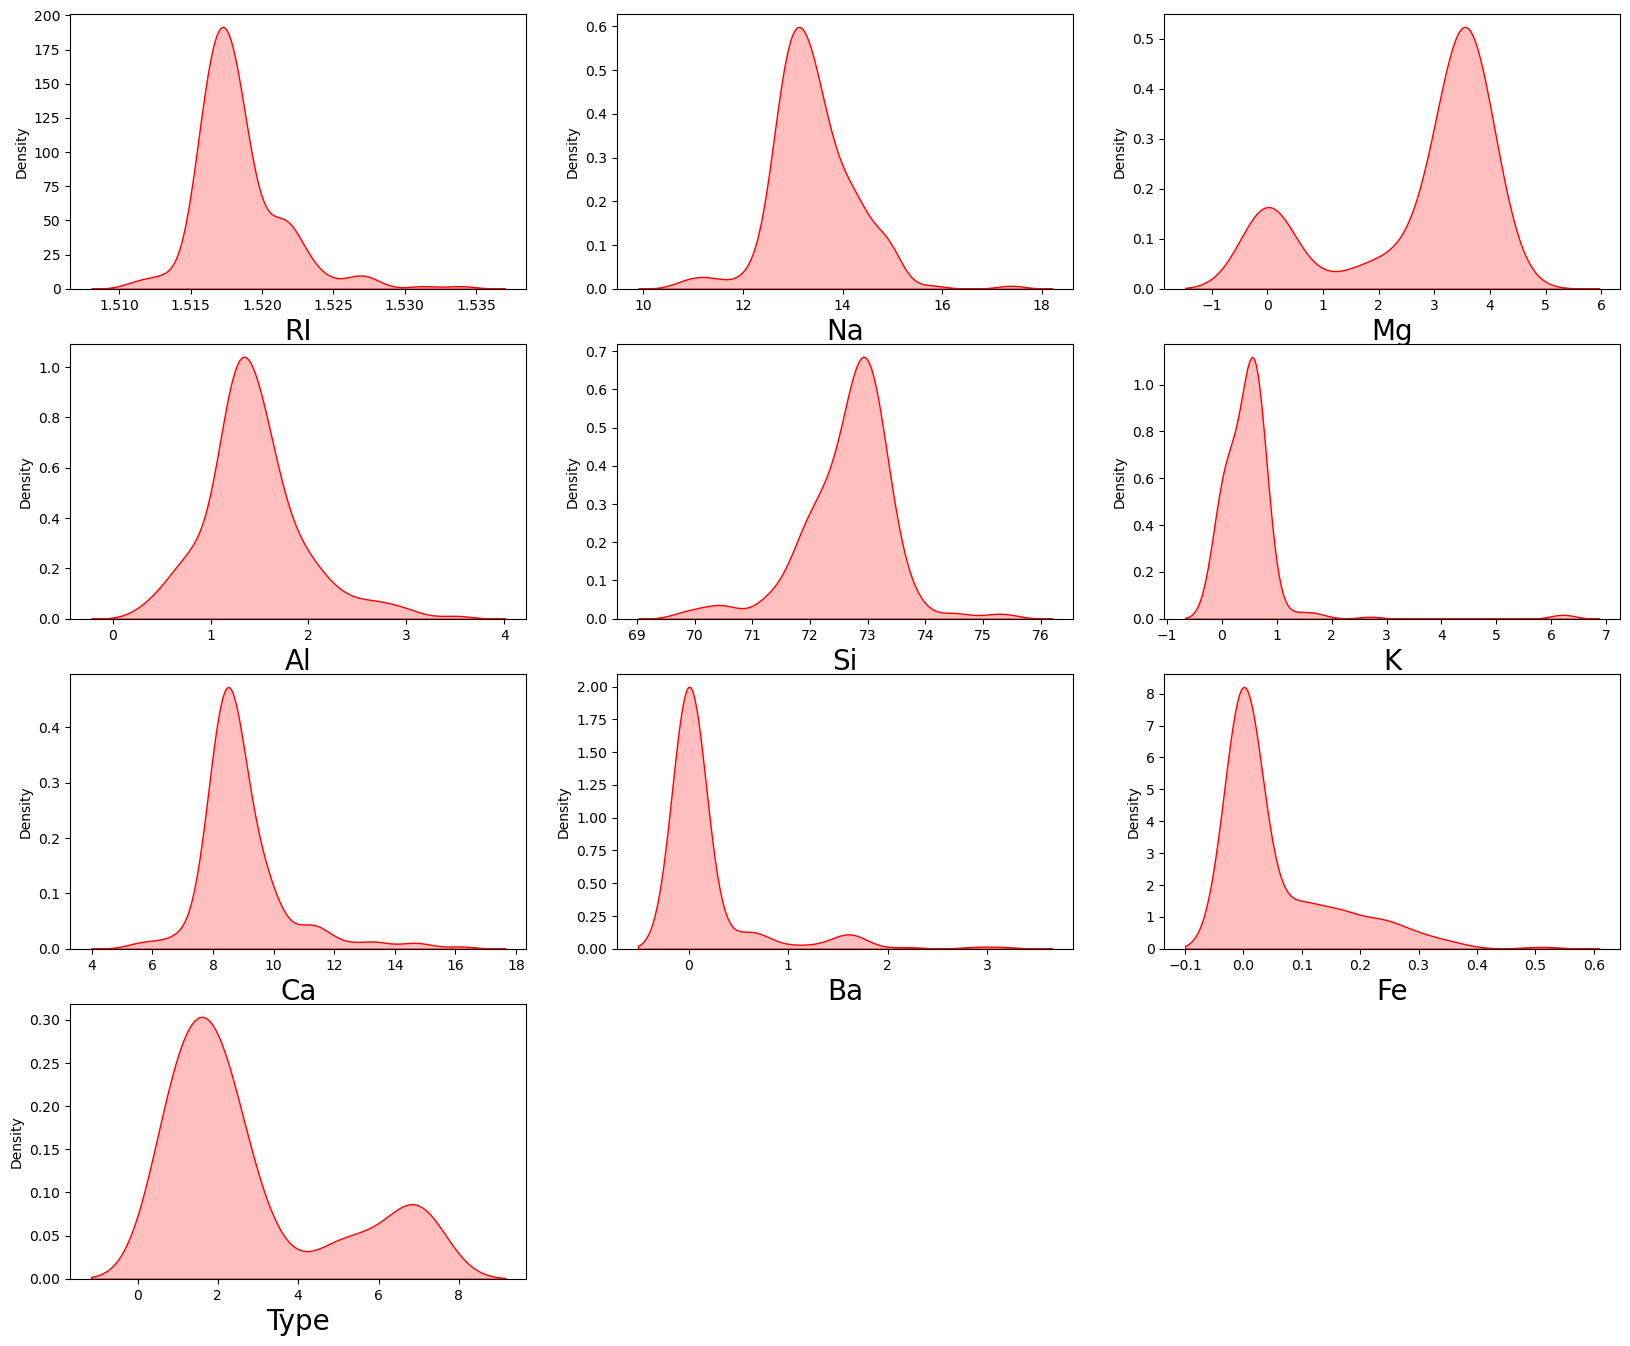

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=10:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
# above plot shows there are many columns data which is right skewed such as Ri,Na,Al,K,Ca,Ba,Fe
# And we can see skeness is very high in some columns so there may be outlier present lets see 

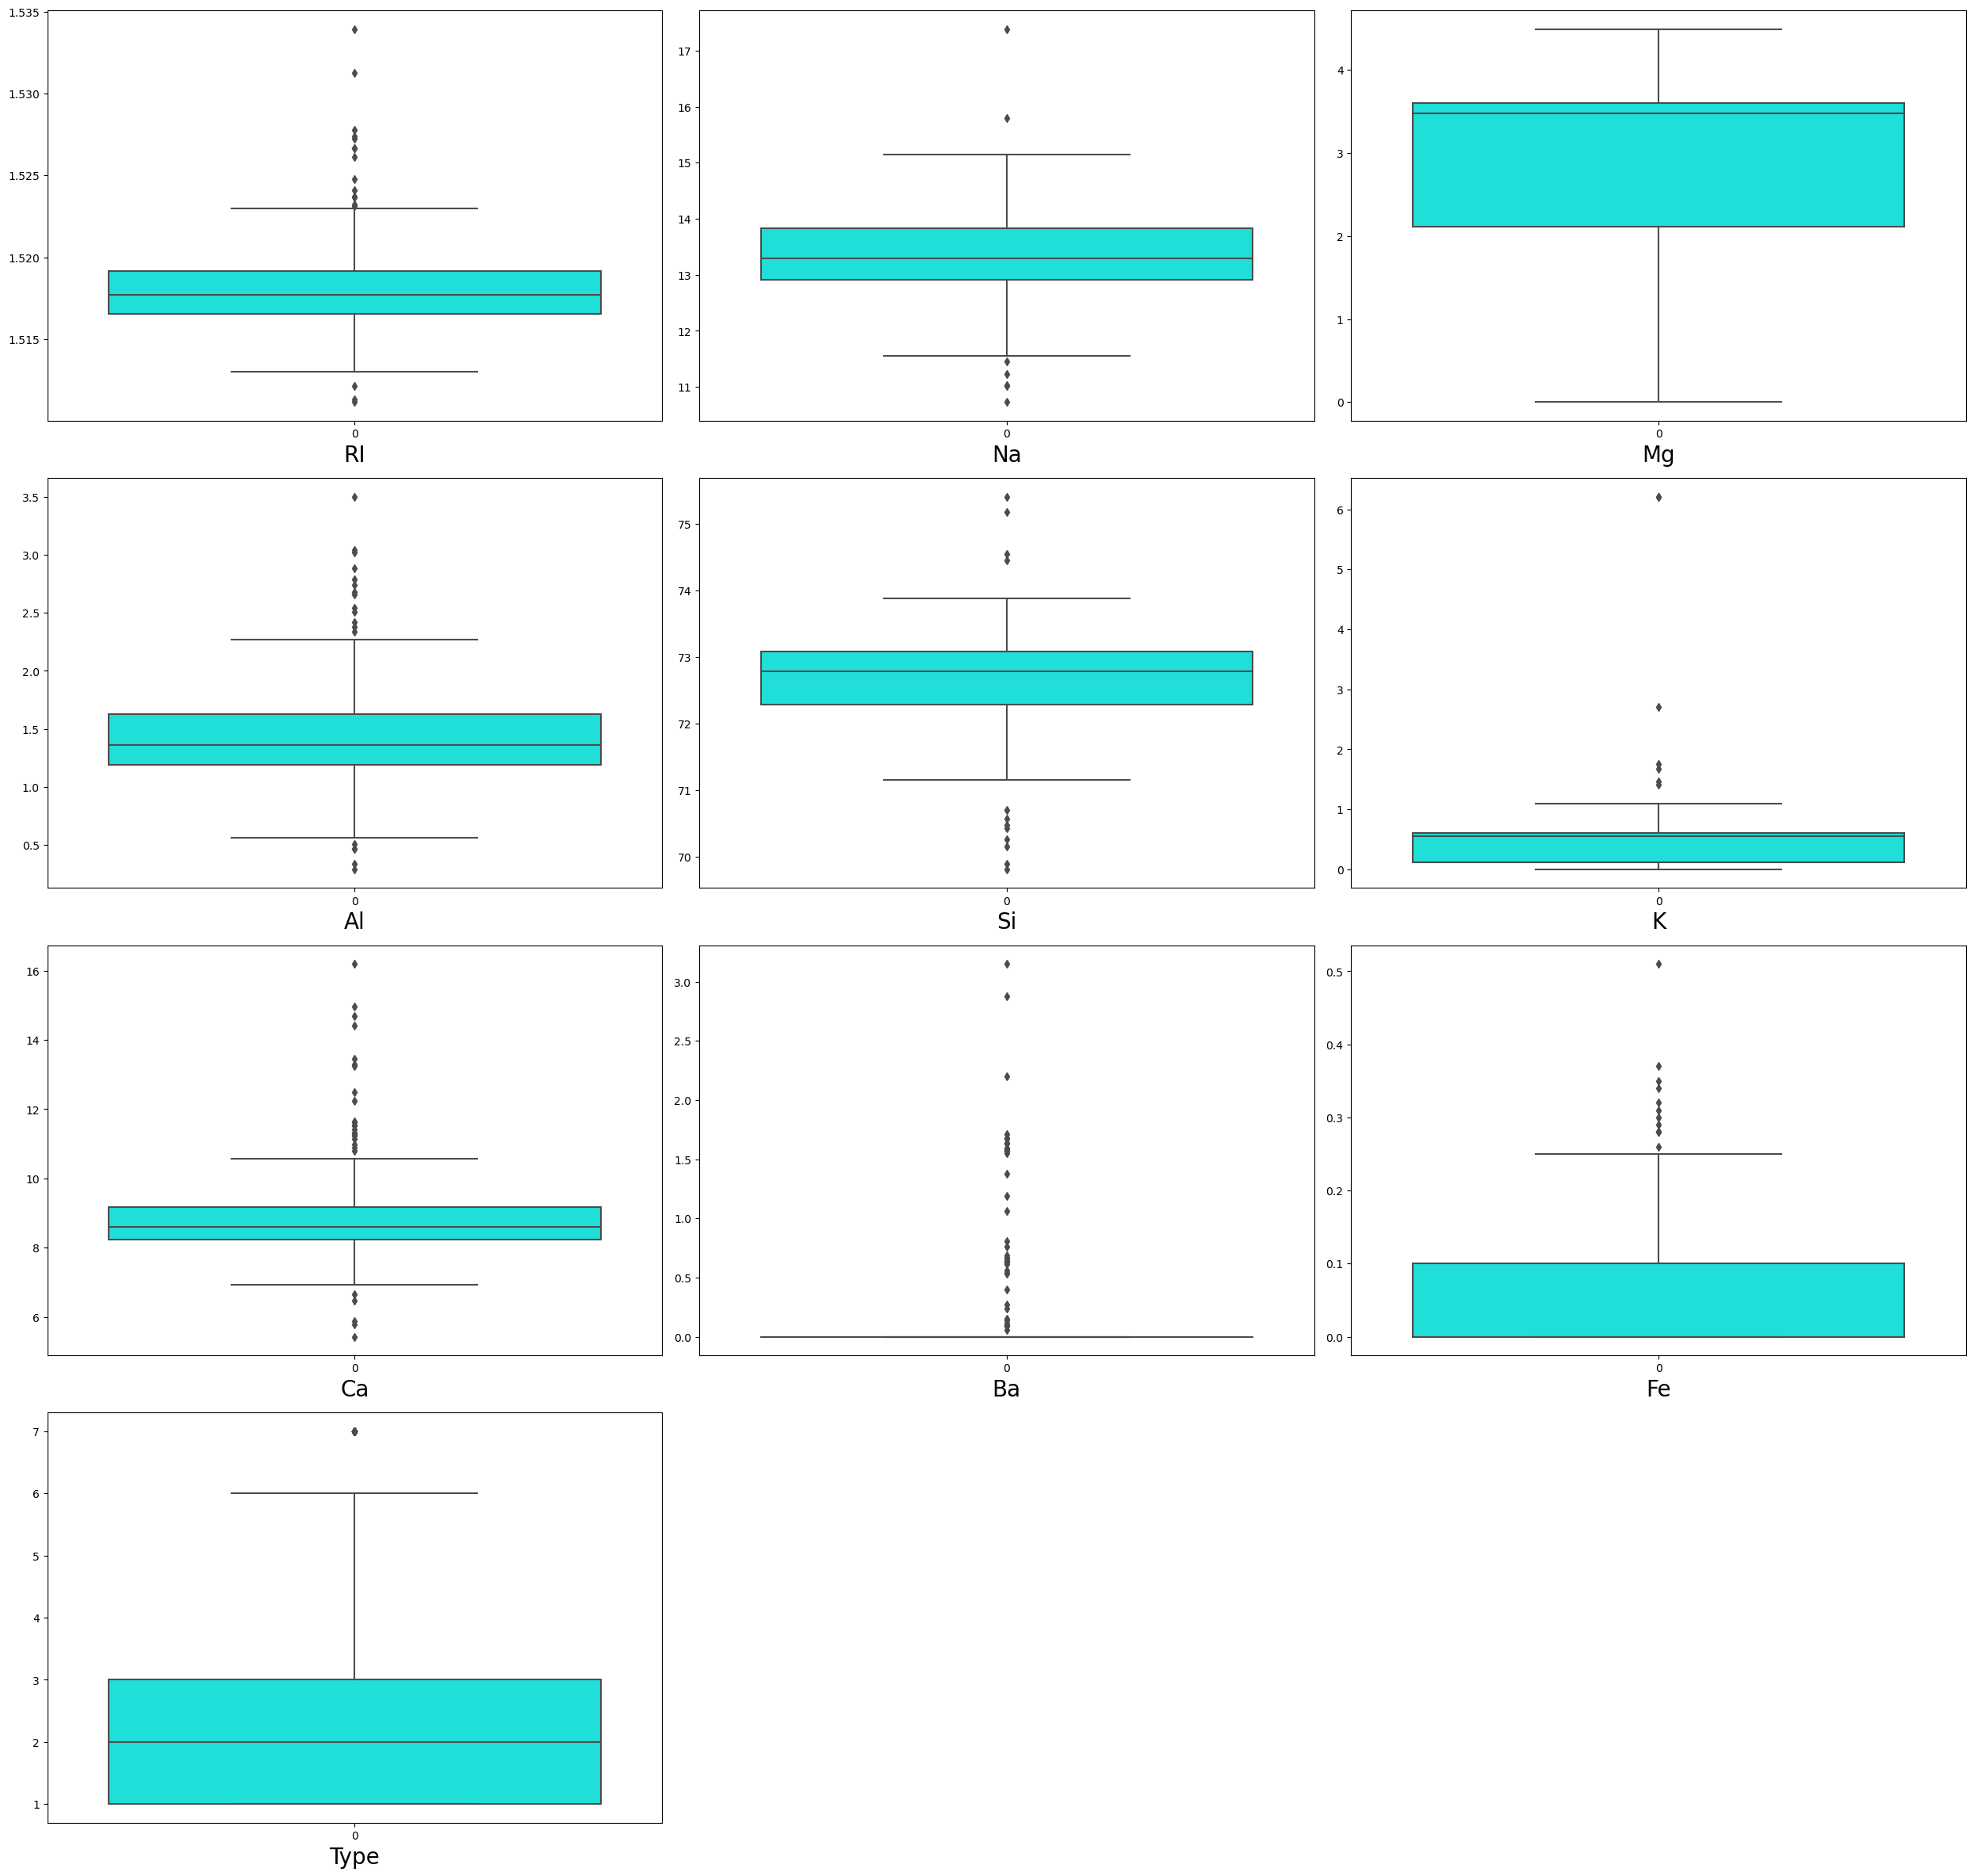

In [12]:
plt.figure(figsize=(25,35), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=10:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [13]:
# Glass making requires composition of different chemicals in which each glass composition changes and we cannot eliminate higher values of chemical composition

<Axes: >

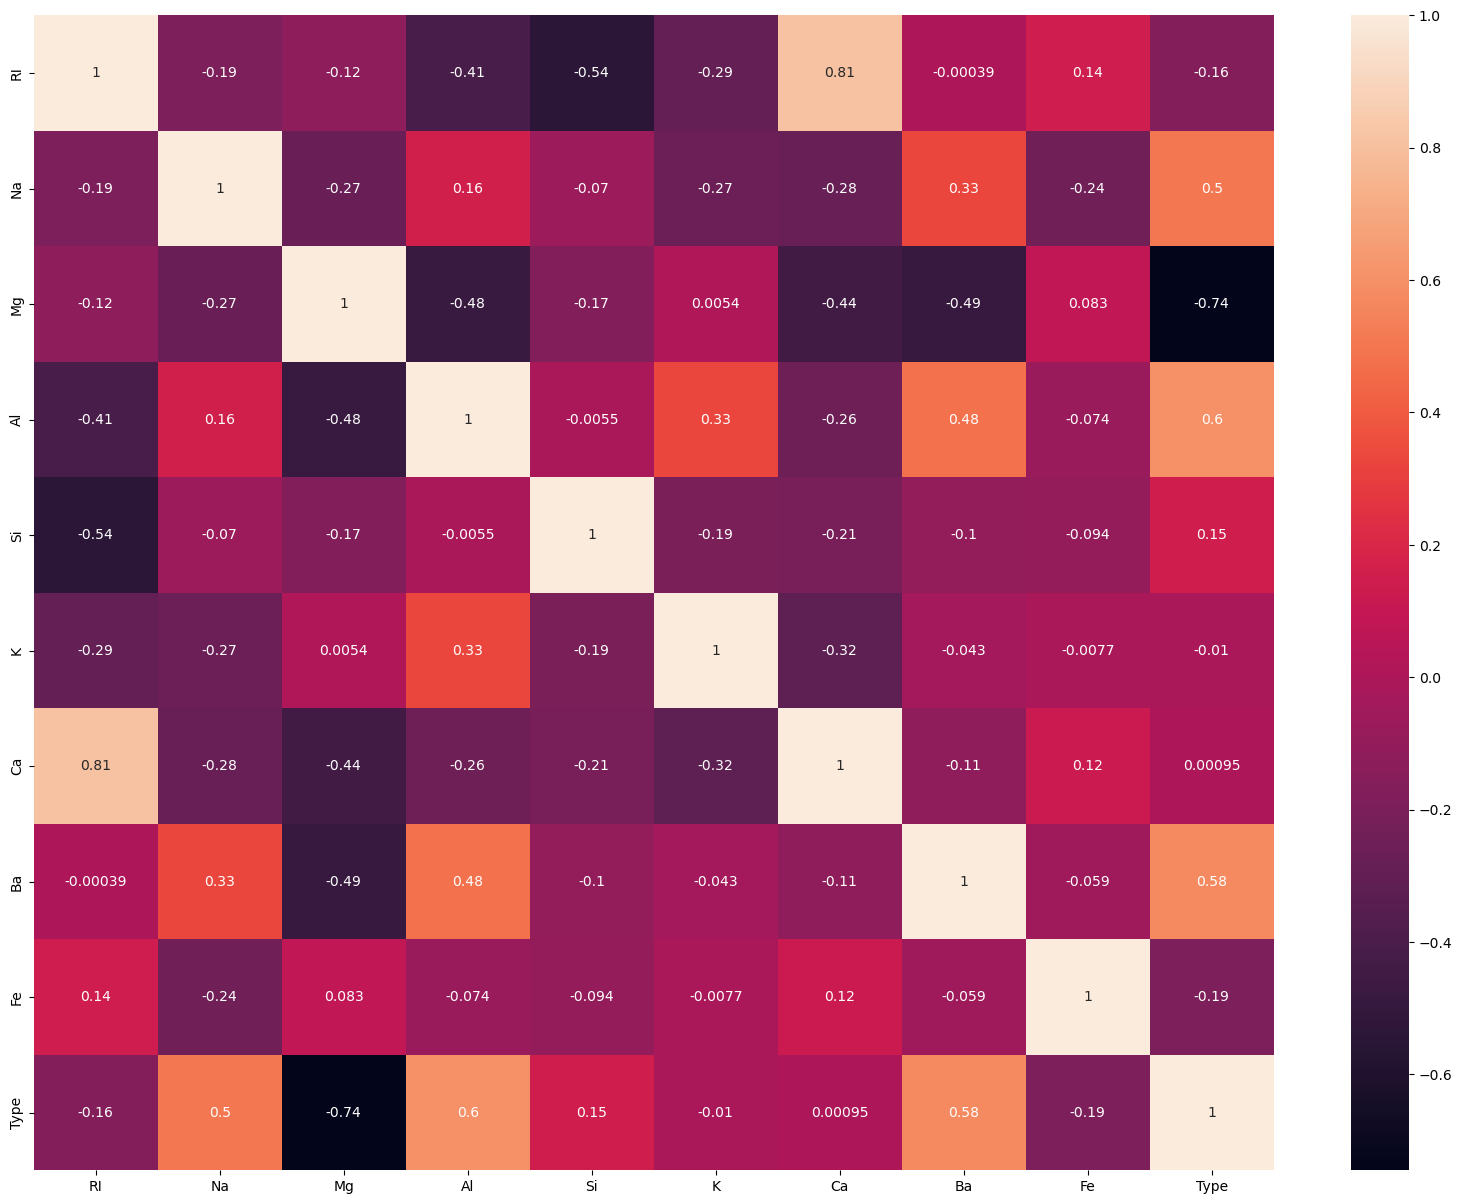

In [14]:
# Lets check the multicollinearity between the features 
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot = True)

In [15]:
# we can see that there is a High positive correlation between ca and Ri & there is a negative correlation between Si and Rl But as data is of classification and we have limited composition in datasets we will not eliminate any column data s it might help us in label selection. 

In [16]:
# we will use Principal component Analysis to select the best number of features for our model

In [17]:
x = df.drop(columns = ['Type'])

In [18]:
y=df['Type']

In [19]:

y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [20]:
# let's standardise the data first 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

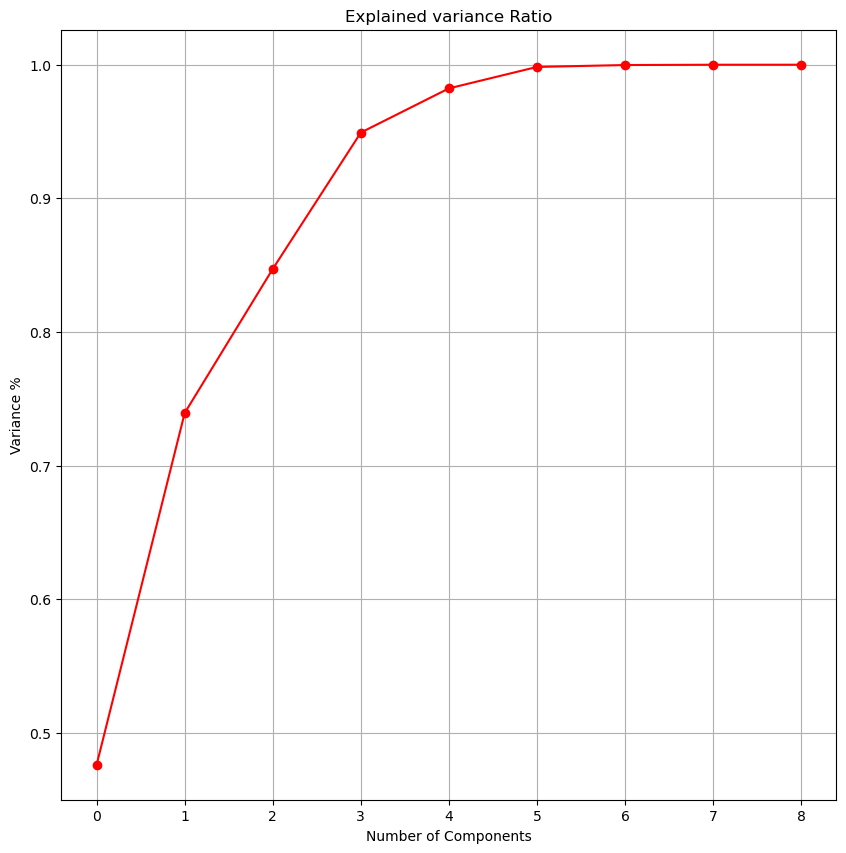

In [21]:
pca = PCA(random_state=1)
pca.fit_transform(x)
# Graph for PCA 
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [22]:
# The first 5 components contribute 99% so we again run analysis with these 5 components.
pca_new = PCA(n_components=5)
x_new = pca_new.fit_transform(x)

In [23]:
# we have our features and target variable now we can start model building 

In [24]:
x = x_new


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
# let's start model building 

#support vector machines 
model_svm = SVC()
model_svm.fit(x_train,y_train)
y_pred = model_svm.predict(x_test)
svm_score = metrics.accuracy_score(y_pred,y_test)


svm_score


0.7538461538461538

In [30]:
# Decision tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
y_pred = dec_tree.predict(x_test)
dt_score = metrics.accuracy_score(y_pred,y_test)

In [31]:
dt_score

0.6461538461538462

In [35]:
# Random forest
rand_forest=RandomForestClassifier(max_depth = 3,min_samples_split =2,n_estimators =50,random_state=1)
rand_forest.fit(x_train,y_train)
y_pred=rand_forest.predict(x_test)
rand_score = metrics.accuracy_score(y_pred,y_test)
rand_score

0.7384615384615385

In [41]:
# In the bove three classifier models SVM gives highest accuracy so we use this model and Perform hyper paramaeter tuning to increase the accuracy score
tuned =  [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(),tuned,cv=5,scoring ='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [42]:
# Running Final model 
model = grid.best_estimator_
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
metrics.accuracy_score(y_pred,y_test)

0.6923076923076923

Text(248.7222222222224, 0.5, 'predicted label')

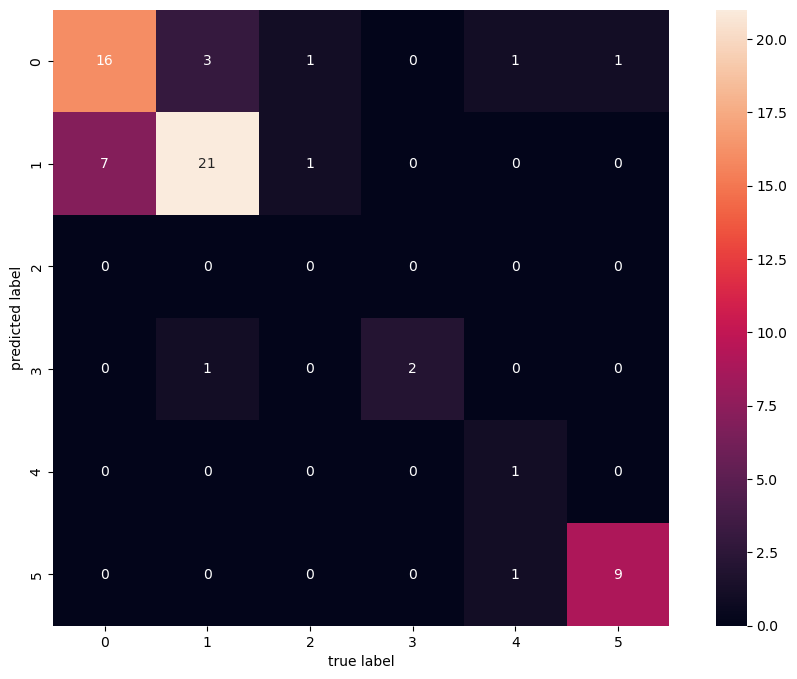

In [46]:
# hyper parameter tuning decreases the score so we use initial model instead
# let's start model building 

#support vector machines 
model_svm = SVC()
model_svm.fit(x_train,y_train)
y_pred = model_svm.predict(x_test)
svm_score = metrics.accuracy_score(y_pred,y_test)




# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.70      0.71        23
           2       0.72      0.84      0.78        25
           3       0.00      0.00      0.00         2
           5       0.67      1.00      0.80         2
           6       1.00      0.33      0.50         3
           7       0.90      0.90      0.90        10

    accuracy                           0.75        65
   macro avg       0.67      0.63      0.61        65
weighted avg       0.74      0.75      0.74        65

